# Clustering

**Author - Girish Shirke, Date - 28/03/2020**

### KMeans clustering 

*Online retail store wants to cluster the customers according to RFM(Recency, Frequency, Monitory Value) type marketing*

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [94]:
data = pd.read_csv('Online+Retail.csv',sep = ',',encoding = "ISO-8859-1", header= 0)

In [95]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [96]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format = "%d-%m-%Y %H:%M")

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [98]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [99]:
orderwise = data.dropna()

In [100]:
orderwise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


**RFM analysis**

In RFM analysis, you look at the recency, frequency and the monetary scores of all the customers for segmentation.

    Recency: It measures how recently you visited the store or made a purchase
    Frequency: It measures the frequency of the transactions the customers made
    Monetary: It measures how much the customer spent on purchases he/she made

In [101]:
amount  = pd.DataFrame(orderwise.Quantity * orderwise.UnitPrice, columns = ["Amount"])

In [102]:
orderwise = pd.concat(objs = [orderwise, amount], axis = 1, ignore_index = False)

In [103]:
monetary = orderwise.groupby('CustomerID').Amount.sum() 

In [104]:
monetary = monetary.reset_index()
monetary.head()
#This is the M dataframe from RFM analysis

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [105]:
f = orderwise.groupby('CustomerID').InvoiceDate.count()

In [106]:
f = f.reset_index()
f.head()
#This is the F dataframe from RFM analysis

,CustomerID,InvoiceDate
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [107]:
master = monetary.merge(f, on='CustomerID', how='inner')

In [108]:
master.head()

,CustomerID,Amount,InvoiceDate
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [109]:
recency = orderwise[['CustomerID','InvoiceDate']]
maximum = max(recency.InvoiceDate)
maximum = maximum + pd.DateOffset(days=1)
recency['diff'] = maximum - recency.InvoiceDate
recency.head()

,CustomerID,InvoiceDate,diff
0,17850.0,2010-12-01 08:26:00,374 days 04:24:00
1,17850.0,2010-12-01 08:26:00,374 days 04:24:00
2,17850.0,2010-12-01 08:26:00,374 days 04:24:00
3,17850.0,2010-12-01 08:26:00,374 days 04:24:00
4,17850.0,2010-12-01 08:26:00,374 days 04:24:00


In [110]:
df = pd.DataFrame(recency.groupby('CustomerID').diff.min())
df = df.reset_index()
df.columns = ["CustomerID", "Recency"]

In [111]:
RFM = f.merge(monetary, on = "CustomerID")
RFM = RFM.merge(df, on = "CustomerID")
RFM.head()

,CustomerID,InvoiceDate,Amount,Recency
0,12346.0,2,0.00,326 days 02:33:00
1,12347.0,182,4310.00,2 days 20:58:00
2,12348.0,31,1797.24,75 days 23:37:00
3,12349.0,73,1757.55,19 days 02:59:00
4,12350.0,17,334.40,310 days 20:49:00


In [112]:
RFM = RFM.rename(columns={"InvoiceDate":"Frequency","Amount":"Monetary"})

In [114]:
print(RFM.shape)
RFM.head(5)

(4372, 4)


,CustomerID,Frequency,Monetary,Recency
0,12346.0,2,0.00,326 days 02:33:00
1,12347.0,182,4310.00,2 days 20:58:00
2,12348.0,31,1797.24,75 days 23:37:00
3,12349.0,73,1757.55,19 days 02:59:00
4,12350.0,17,334.40,310 days 20:49:00


*Removing Outliers: One way to do it is by eliminating all the data points which fall outside the 1.5 times the IQR of the 1st and the 3rd quartile.*

{'whiskers': [<matplotlib.lines.Line2D at 0x7f18a505e400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f18a5052748>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f18a505e7b8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f18a5052c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f18b2e67860>],
 'means': []}

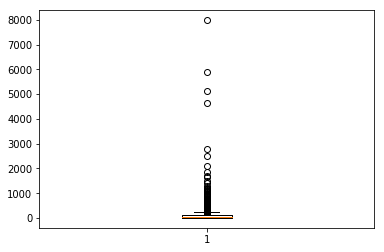

In [115]:
plt.boxplot(RFM.Frequency)

In [116]:
Q1 = RFM.Monetary.quantile(0.25)
Q3 = RFM.Monetary.quantile(0.75)
IQR = Q3-Q1
print(IQR)
#This sis the IQR score of each column
RFM = RFM[(RFM.Monetary >= Q1 - 1.5*IQR) & (RFM.Monetary <= Q3 + 1.5*IQR)]


1318.3624999999993


In [117]:
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3-Q1
print(IQR)
#This sis the IQR score of each column
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]


65.0


In [118]:
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3-Q1
print(IQR)
#This sis the IQR score of each column
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]


147 days 01:01:00


In [119]:
print(RFM.shape)
RFM.head(5)

(3697, 4)


,CustomerID,Frequency,Monetary,Recency
0,12346.0,2,0.00,326 days 02:33:00
2,12348.0,31,1797.24,75 days 23:37:00
3,12349.0,73,1757.55,19 days 02:59:00
4,12350.0,17,334.40,310 days 20:49:00
5,12352.0,95,1545.41,36 days 22:13:00
